In [1]:
import importlib
import matplotlib.pyplot as plt
import sys
import tensorflow as tf


sys.path.append("../../")

from astroLuSt.datascience import layers as aldala
from astroLuSt.styles import plot_styles as alstps

importlib.reload(aldala)
importlib.reload(alstps)

#style for plotting
_ = alstps.tre_light()

2024-11-11 08:59:46.403783: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Sampling Layer

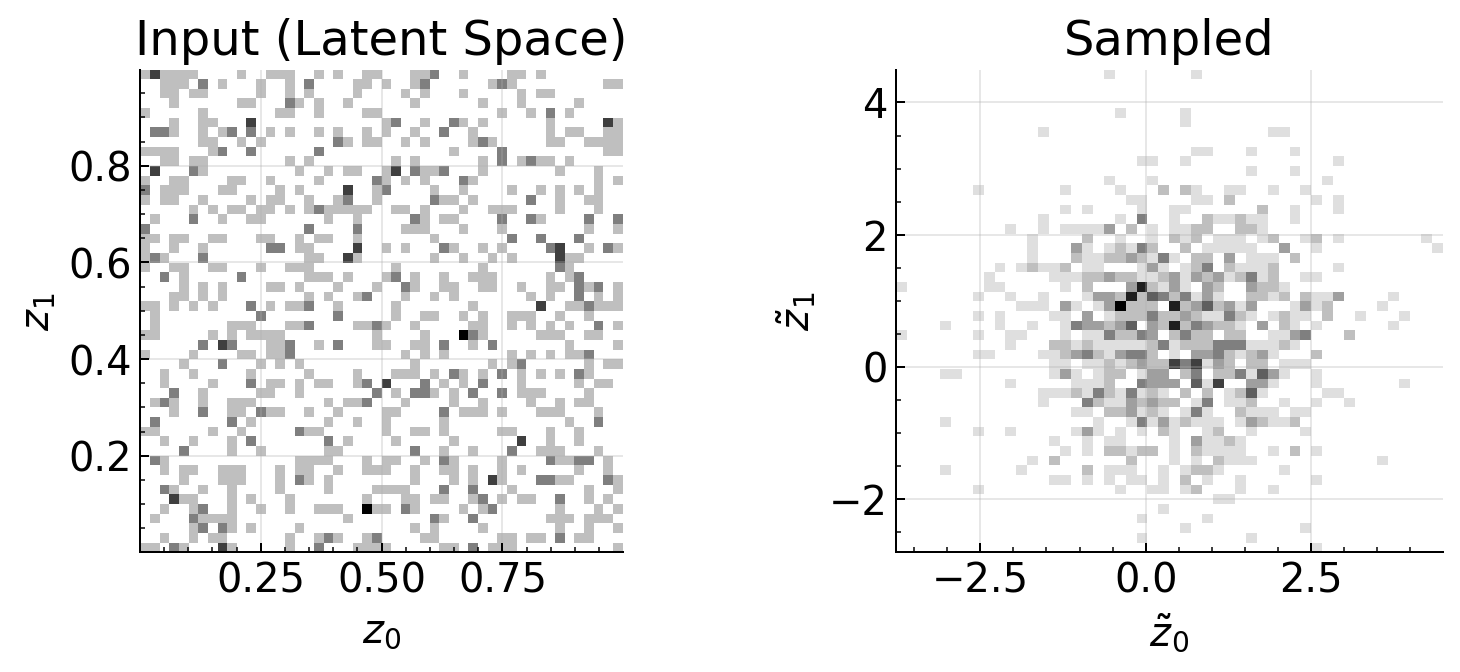

In [2]:
samp = aldala.Sampling()

z_mu        = tf.random.uniform((1000,4), minval=0, maxval=1, dtype=tf.float32)
z_log_var   = tf.random.uniform((1000,4), minval=0, maxval=.5, dtype=tf.float32)

# Test input data (mean and log-variance of the latent space)
# z_mu        = tf.constant([[0.0, 0.0], [1.0, 1.0]], dtype=tf.float32)
# z_log_var   = tf.constant([[0.1, 0.1], [0.5, 0.5]], dtype=tf.float32)

z = samp((z_mu, z_log_var))

fig = plt.figure(figsize=(9,4))
ax1 = fig.add_subplot(121, aspect="equal", title="Input (Latent Space)")
ax2 = fig.add_subplot(122, aspect="equal", title="Sampled")
ax1.hist2d(*tf.transpose(z_mu[:,:2]), bins=(50,50))
ax2.hist2d(*tf.transpose(z[:,:2]), bins=(50,50))
ax1.set_xlabel(r"$z_0$")
ax1.set_ylabel(r"$z_1$")
ax2.set_xlabel(r"$\tilde z_0$")
ax2.set_ylabel(r"$\tilde z_1$")
fig.tight_layout()
plt.show()

